In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import zipfile
import os

# ZIP 파일들이 있는 Google Drive 폴더 경로 설정
zip_folder_path = "/content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Final_Data"  # 실제 ZIP 파일들이 있는 경로로 변경
extract_base_path = "/content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason"  # 압축 해제 폴더 경로

# 압축 해제 폴더 생성
os.makedirs(extract_base_path, exist_ok=True)

# 폴더 내의 모든 ZIP 파일을 순회하며 압축 해제
for zip_filename in os.listdir(zip_folder_path):
    if zip_filename.endswith(".zip"):
        zip_path = os.path.join(zip_folder_path, zip_filename)
        extract_path = os.path.join(extract_base_path, zip_filename[:-4])  # ZIP 파일명으로 서브 폴더 생성

        # 각 ZIP 파일을 해당 폴더에 압축 해제
        os.makedirs(extract_path, exist_ok=True)
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)

        print(f"Extracted {zip_filename} to {extract_path}")

print("All files have been extracted.")



Extracted TL_Part2_NonClickbait_Auto_EC.zip to /content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/TL_Part2_NonClickbait_Auto_EC
Extracted TL_Part2_Clickbait_Auto_EC.zip to /content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/TL_Part2_Clickbait_Auto_EC
Extracted TL_Part2_Clickbait_Direct_EC.zip to /content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/TL_Part2_Clickbait_Direct_EC
Extracted TL_Part1_Clickbait_Direct_EC.zip to /content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/TL_Part1_Clickbait_Direct_EC
Extracted TL_Part1_Clickbait_Auto_EC.zip to /content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/TL_Part1_Clickbait_Auto_EC
Extracted TL_Part1_NonClickbait_Auto_EC.zip to /content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/TL_Part1_NonClickbait_Auto_EC
All files have been extracted.


**데이터 전처리**

In [53]:
json_folder_path = "/content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Final_Data"

In [52]:
import os
import pandas as pd
import re
import json

In [54]:
# 텍스트 전처리 함수 정의
def preprocess_text(text):
    text = text.lower()  # 소문자로 변환
    text = re.sub(r'\W+', ' ', text)  # 특수 문자 제거
    return text.strip()

# 전처리된 데이터를 저장할 빈 DataFrame
processed_data = pd.DataFrame()

# 폴더 내의 모든 JSON 파일을 전처리
for json_filename in os.listdir(json_folder_path):
    if json_filename.endswith(".json"):
        json_path = os.path.join(json_folder_path, json_filename)

        # JSON 파일을 읽어서 DataFrame으로 변환
        with open(json_path, 'r', encoding='utf-8') as file:
            data = json.load(file)

        # 데이터가 리스트 형태로 포함된 경우 DataFrame으로 변환
        df = pd.DataFrame(data)

        # 결측치 처리
        df = df.dropna()  # 결측치가 있는 행을 제거

        # 중복 제거
        df = df.drop_duplicates()

        # 텍스트 컬럼 전처리 (예시: 'text' 컬럼이 있다고 가정)
        if 'text' in df.columns:
            df['text'] = df['text'].apply(preprocess_text)

        # 라벨 인코딩 (예시: 'label' 컬럼이 있다고 가정)
        if 'label' in df.columns:
            df['label'] = df['label'].apply(lambda x: 1 if x == 'clickbait' else 0)  # 예시로 'clickbait'와 'non-clickbait'를 1과 0으로 변환

        # 전처리된 데이터 통합
        processed_data = pd.concat([processed_data, df], ignore_index=True)

# 최종 전처리된 데이터 확인
print("Data after preprocessing:")
print(processed_data.head())

# 필요시 전처리된 데이터를 CSV 파일로 저장
processed_data.to_csv("/content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/preprocessed_clickbait_data.csv", index=False)



Data after preprocessing:
Empty DataFrame
Columns: [sourceDataInfo, labeledDataInfo]
Index: []


KeyError: 'text'

In [55]:
import os
import json
import pandas as pd
import re

# 텍스트 전처리 함수 정의
def preprocess_text(text):
    text = text.lower()  # 소문자로 변환
    text = re.sub(r'\W+', ' ', text)  # 특수 문자 제거
    return text.strip()

# 모든 JSON 파일 데이터를 저장할 빈 리스트
data_list = []

# 폴더 내의 모든 JSON 파일을 순회하며 필요한 정보 추출
for json_filename in os.listdir(json_folder_path):
    if json_filename.endswith(".json"):
        json_path = os.path.join(json_folder_path, json_filename)

        with open(json_path, 'r', encoding='utf-8') as file:
            json_data = json.load(file)

            # 필요한 정보 추출
            title = json_data["sourceDataInfo"]["newsTitle"]
            content = json_data["sourceDataInfo"]["newsContent"]
            label = json_data["labeledDataInfo"]["clickbaitClass"]  # 0: 비낚시성, 1: 낚시성

            # 텍스트 전처리
            title = preprocess_text(title)
            content = preprocess_text(content)

            # 데이터 리스트에 추가
            data_list.append({
                "title": title,
                "content": content,
                "label": label
            })

# DataFrame으로 변환
df = pd.DataFrame(data_list)

# 데이터 확인
print("데이터 샘플:")
print(df.head())

# CSV 파일로 저장 (원하는 경우)
df.to_csv("/content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/preprocessed_clickbait_data.csv", index=False)


데이터 샘플:
                                      title  \
0   文 사회적경제 활성화 방안 성패 사회적경제 자생력과 정치권에 달려 있어   
1  오늘의 sr이슈 윤리 문제 불거진 종근당 회장 조사 마치고 귀가 사죄한다   
2                기업 규모에 따라 csr 공시 연착륙 필요 있어   
3                             오늘의 이슈 책과 csr   
4           2017 다우존스 지속가능경영지수 어떤 기업이 편입되었나   

                                             content  label  
0  문재인정부가 사회적 경제 활성화 방안을 내놓은 가운데 정책의 성패는 사회적경제의 자...      0  
1  사죄한다 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한 종근당 ...      0  
2  기업의 규모 특성에 따라 csr 정보 공시 내용을 의무와 권고로 나눠 기업들이 부담...      0  
3  책을 기업의 사회적 책임 csr 활동에 활용하는 회사가 많아지고 있다 책과 csr ...      0  
4  런던 현지 시각으로 7일 스탠다드앤푸어스 다우존스 인디시즈와 로베코샘이 다우존스지속...      0  


In [56]:
import torch
from transformers import AutoTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# 1. KoBERT 모델과 토크나이저 로드
model_name = "skt/kobert-base-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)  # AutoTokenizer로 변경
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 2. 커스텀 데이터셋 클래스 정의
class ClickbaitDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # 제목과 본문을 합친 텍스트
        text = self.df.iloc[idx]['title'] + " " + self.df.iloc[idx]['content']
        label = self.df.iloc[idx]['label']

        # 토크나이저로 텍스트 전처리
        inputs = self.tokenizer(
            text,
            return_tensors='pt',
            truncation=True,
            padding='max_length',
            max_length=self.max_length
        )

        # 필요한 데이터 반환
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.long)
        }

# 3. DataLoader 생성
dataset = ClickbaitDataset(df, tokenizer)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

# 4. 모델 예측 수행 함수 정의
def predict(model, dataloader, device):
    model.eval()
    predictions = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            # 모델 예측 수행
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probabilities = torch.nn.functional.softmax(logits, dim=1)
            bait_probabilities = probabilities[:, 1].cpu().numpy()  # 낚시성 확률 추출
            predictions.extend(bait_probabilities)

    return predictions

# 5. 예측 수행
bait_probabilities = predict(model, dataloader, device)

# 6. DataFrame에 결과 추가
df['bait_probability'] = bait_probabilities
print(df[['title', 'content', 'label', 'bait_probability']])

# 7. 결과 CSV 파일로 저장 (선택 사항)
df.to_csv("/content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Data_Jason/predicted_clickbait_data.csv", index=False)



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at skt/kobert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


                                        title  \
0     文 사회적경제 활성화 방안 성패 사회적경제 자생력과 정치권에 달려 있어   
1    오늘의 sr이슈 윤리 문제 불거진 종근당 회장 조사 마치고 귀가 사죄한다   
2                  기업 규모에 따라 csr 공시 연착륙 필요 있어   
3                               오늘의 이슈 책과 csr   
4             2017 다우존스 지속가능경영지수 어떤 기업이 편입되었나   
..                                        ...   
840            대통령 감각이 대단 손발 오그라드는 청와대 언론 플레이   
841                 mbc 감사 후보 모두 탈락 김재우 의중 작용   
842                      월드컵 개막일 mbc 사상 초유 징계   
843                 추도식 사회 때문에 연기되는 거라면 그만두겠다   
844                   잊지않겠다 노무현 시청광장 2만 추모 물결   

                                               content  label  \
0    문재인정부가 사회적 경제 활성화 방안을 내놓은 가운데 정책의 성패는 사회적경제의 자...      0   
1    사죄한다 운전기사들에게 허구한 날 폭언을 퍼부어 윤리 문제가 불거진 이장한 종근당 ...      0   
2    기업의 규모 특성에 따라 csr 정보 공시 내용을 의무와 권고로 나눠 기업들이 부담...      0   
3    책을 기업의 사회적 책임 csr 활동에 활용하는 회사가 많아지고 있다 책과 csr ...      0   
4    런던 현지 시각으로 7일 스탠다드앤푸어스 다우존스 인디시즈와 로베코샘이 다우존스지속...      0   
..                   

In [58]:
import os
import json
import torch
from transformers import AutoTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# 1. KoBERT 모델과 토크나이저 로드
model_name = "skt/kobert-base-v1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 2. JSON 파일 불러오기 및 전처리
json_folder_path = "/content/drive/MyDrive/146.낚시성 기사 탐지 데이터/Value_Data"  # JSON 파일들이 저장된 폴더 경로
data_list = []

# JSON 파일 읽기 및 필요한 정보 추출
for json_filename in os.listdir(json_folder_path):
    if json_filename.endswith(".json"):
        json_path = os.path.join(json_folder_path, json_filename)

        with open(json_path, 'r', encoding='utf-8') as file:
            json_data = json.load(file)

            # 필요한 정보 추출
            title = json_data["sourceDataInfo"]["newsTitle"]
            content = json_data["sourceDataInfo"]["newsContent"]
            label = json_data["labeledDataInfo"]["clickbaitClass"]  # 0: 비낚시성, 1: 낚시성

            # 데이터 리스트에 추가
            data_list.append({
                "title": title,
                "content": content,
                "label": label
            })

# DataFrame으로 변환
df = pd.DataFrame(data_list)

# 3. 커스텀 데이터셋 클래스 정의
class ClickbaitDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # 제목과 본문을 합친 텍스트
        text = self.df.iloc[idx]['title'] + " " + self.df.iloc[idx]['content']
        label = self.df.iloc[idx]['label']

        # 토크나이저로 텍스트 전처리
        inputs = self.tokenizer(
            text,
            return_tensors='pt',
            truncation=True,
            padding='max_length',
            max_length=self.max_length
        )

        # 필요한 데이터 반환
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()

        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'label': torch.tensor(label, dtype=torch.long)
        }

# 4. DataLoader 생성
dataset = ClickbaitDataset(df, tokenizer)
dataloader = DataLoader(dataset, batch_size=16, shuffle=False)

# 5. 모델 예측 함수 정의
def predict(model, dataloader, device):
    model.eval()
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in dataloader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            # 모델 예측 수행
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1)

            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

# 6. 예측 수행 및 성능 평가
predictions, true_labels = predict(model, dataloader, device)

# 평가 지표 계산
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at skt/kobert-base-v1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.5417
Precision: 0.5417
Recall: 1.0000
F1 Score: 0.7027


Accuracy: 0.5000
Precision: 0.5000
Recall: 0.5000
F1 Score: 0.5000


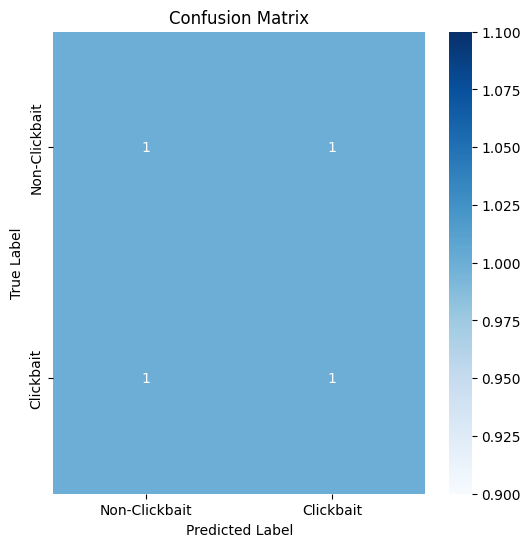

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 성능 평가 함수 정의
def evaluate_model_performance(true_labels, predictions):
    # 정확도, 정밀도, 재현율, F1 점수 계산
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions)
    recall = recall_score(true_labels, predictions)
    f1 = f1_score(true_labels, predictions)

    # 혼동 행렬 계산
    conf_matrix = confusion_matrix(true_labels, predictions)

    # 성능 지표 출력
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # 혼동 행렬 시각화
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Clickbait", "Clickbait"], yticklabels=["Non-Clickbait", "Clickbait"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

# 예시 사용법 (예측과 실제 라벨이 준비된 경우)
# predictions, true_labels는 predict 함수에서 얻은 값들을 사용합니다.
predictions, true_labels = [1, 0, 1, 0], [1, 0, 0, 1]  # 예시 데이터
evaluate_model_performance(true_labels, predictions)
